In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [3]:
FLAVORS=['nue','nuebar','numu','numubar']
def get_all_fluxes(horn):
    flux={}
    el = {}
    er = {}
    ec = {}
    de = {}
    for nu in FLAVORS:
        el[nu], er[nu], flux[nu], _ = np.genfromtxt(f"{horn}_{nu}.dat",unpack=True,skip_header=5)
        de[nu]=(er[nu]-el[nu])
        flux[nu]/=de[nu]
        ec[nu] = de[nu]/2.0+el[nu]
    return ec,de,flux
        
efhc, defhc, fhc =get_all_fluxes('FHC')
erhc, derhc, rhc =get_all_fluxes('RHC')

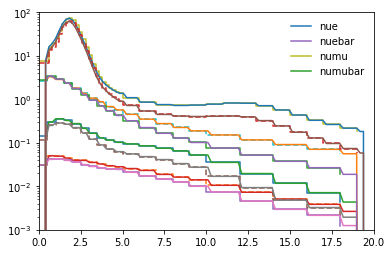

In [4]:
myE = np.linspace(0,20.0,100)
interp_fhc={}
interp_rhc={}
for nu in FLAVORS:
    plt.step(efhc[nu]-defhc[nu]/2, fhc[nu],label=nu, where='post')
    plt.step(erhc[nu]-derhc[nu]/2, rhc[nu],ls='--', where='post')
    func=interpolate.interp1d(efhc[nu],fhc[nu],bounds_error=False,fill_value=0,kind='nearest')
    interp_fhc[nu]=func(myE)
    plt.plot(myE,interp_fhc[nu])
   
    func=interpolate.interp1d(erhc[nu],rhc[nu],bounds_error=False,fill_value=0,kind='nearest')
    interp_rhc[nu]=func(myE)
    plt.plot(myE,interp_rhc[nu])

plt.xlim(0.0,20)
plt.ylim(1e-3,1e2)
plt.yscale('log')
plt.legend(frameon=False)

In [5]:
globes_fhc = [myE, 
                interp_fhc['nue'],
              interp_fhc['numu'],
              interp_fhc['numu']*0,
                interp_fhc['nuebar'],
              interp_fhc['numubar'],
              interp_fhc['numu']*0]              

globes_rhc = [myE, 
                interp_rhc['nue'],
              interp_rhc['numu'],
              interp_rhc['numu']*0,
                interp_rhc['nuebar'],
              interp_rhc['numubar'],
              interp_rhc['numu']*0]              

In [6]:
np.savetxt("../NOvA_FHC.dat",np.array(globes_fhc).T,header='nus/m^2/GeV/1e6 POT')
np.savetxt("../NOvA_RHC.dat",np.array(globes_rhc).T,header='nus/m^2/GeV/1e6 POT')

In [7]:
f=np.loadtxt("../NOvA_FHC.dat",unpack=True)
r=np.loadtxt("../NOvA_RHC.dat",unpack=True)

nf=np.loadtxt("../ND280_FHC.dat",unpack=True)
nr=np.loadtxt("../ND280_RHC.dat",unpack=True)

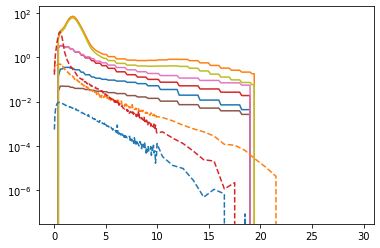

In [8]:
plt.plot(f[0],f[1])
plt.plot(f[0],f[2])
plt.plot(f[0],f[3])
plt.plot(f[0],f[5])
plt.plot(f[0],f[6])

plt.plot(r[0],r[1])
plt.plot(r[0],r[2])
plt.plot(r[0],r[3])
plt.plot(r[0],r[5])
plt.plot(r[0],r[6])
## test
plt.plot(nr[0],nr[1]*1e-15*1e4,ls='--')
plt.plot(nr[0],nr[2]*1e-15*1e4,ls='--')
plt.plot(nr[0],nr[3]*1e-15*1e4,ls='--')
plt.plot(nr[0],nr[5]*1e-15*1e4,ls='--')
plt.plot(nr[0],nr[6]*1e-15*1e4,ls='--')
plt.yscale('log')

In [75]:
enu,xsec = np.genfromtxt("../test_xsecs/C12/Xsec_4PS_mmmm_A12_LE.dat",unpack=True)
enu_cl,xsec_cl = np.genfromtxt("../test_xsecs/Cl35/Xsec_4PS_mmmm_A35_LE.dat",unpack=True)
enu_p,xsec_p = np.genfromtxt("../test_xsecs/Xsec_4PS_mmmm_p_LE.dat",unpack=True)

In [76]:
flux=interpolate.interp1d(efhc['numu'],fhc['numu'],bounds_error=False,fill_value=0,kind='nearest')
xs = interpolate.interp1d(enu,xsec, bounds_error=False, fill_value=0.0)
xs_cl = interpolate.interp1d(enu_cl,xsec_cl, bounds_error=False, fill_value=0.0)
xs_p = interpolate.interp1d(enu_p,xsec_p, bounds_error=False, fill_value=0.0)

In [91]:
invm2_to_incm2=1e-4
zb_to_cm2 = 1e-45
NAvo = 6.02214076*1e23
m_proton = 0.93827208816 # GeV
m_neutron = 0.93956542052 # GeV
m_AVG = (m_proton+m_neutron)/2. # GeV
nucleons_to_tons = NAvo*1e6/m_AVG
GeV2_to_cm2 = 3.89379372e-28 # hbar c = 197.3269804e-16 GeV.cm

totmass=193
cmass=66.7e-2*totmass
massCl=16.1e-2*totmass
massH=10.8e-2*totmass
590.25
POT  = 1.36e15 #1e6
norm = nucleons_to_tons*POT*invm2_to_incm2*1e-44*3.03

e=np.linspace(0,40,1000)
print("CC", np.sum(1e-38*e*flux(e)*norm*(e[1]-e[0])*(cmass+massCl+massH)*1e44/3.03))
print("Events at NOVA C", np.sum(xs(e)*flux(e)*norm*(e[1]-e[0])*6**2*cmass/12))
print("Events at NOVA Cl", np.sum(xs(e)*flux(e)*norm*(e[1]-e[0])*17**2*massCl/35))
print("Events at NOVA p", np.sum(xs(e)*flux(e)*norm*(e[1]-e[0])*(6/12*cmass+17/35*massCl+massH)))

CC 47899528.01704573
Events at NOVA C 12.127554991149399
Events at NOVA Cl 8.057157224005003
Events at NOVA p 3.1497702793105162


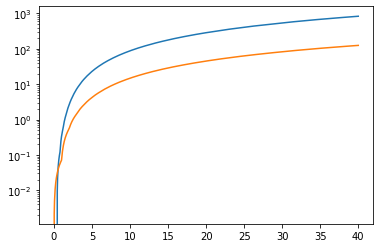

In [70]:
e=np.linspace(0,40,1000)
plt.plot(e,xs(e)*3.03*6**2)
plt.plot(e,xs_p(e)*3.03)
plt.yscale("log")

In [92]:
590.25/23

25.66304347826087

In [94]:
1/25

0.04

In [111]:
data=np.load("../../data/default/MC_events_numu_to_numu_mu+_mu-_coh_6_12_gv_0.000000_ga_0.000000_mz_1.000000.npy")

In [112]:
np.sum(data[-1])

5.712886727811386241

In [116]:
np.sum(interp_fhc['numu']*(myE[1]-myE[0]))

116.49620202020202

In [115]:
116/5.7

20.350877192982455